# Welcome to Covid19 Data Analysis Notebook
------------------------------------------

### Let's Import the modules 

In [194]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


## Task 2 

### Task 2.1: importing covid19 dataset
importing "Covid19_Confirmed_dataset.csv" from "./Dataset" folder. 


In [195]:
corona_dataset_csv = pd.read_csv('Covid19_Confirmed_dataset.csv')
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


#### Let's check the shape of the dataframe

In [196]:
corona_dataset_csv.shape


(266, 104)

In [197]:
corona_dataset_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 104 entries, Province/State to 4/30/20
dtypes: float64(2), int64(100), object(2)
memory usage: 216.2+ KB


In [198]:
columns = corona_dataset_csv.columns
columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20',
       '4/27/20', '4/28/20', '4/29/20', '4/30/20'],
      dtype='object', length=104)

### Task 2.2: Delete the useless columns

In [199]:
#Latitude and Longitude are not important features for us here
#default value, annotation axis=0 which is equal to rows
# note that: the below code will change the corona dataset too
corona_dataset_csv.drop(["Lat","Long"], axis=1, inplace = True)

In [200]:
corona_dataset_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Task 2.3: Aggregating the rows by the country

In [201]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()

In [202]:
corona_dataset_aggregated.head()


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [203]:
corona_dataset_aggregated.shape
#we have 187 countries or regions in 100 days

(187, 100)

### Task 2.4: Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

In [204]:
corona_dataset_aggregated.loc["China"]
#will return pandas series

1/22/20      548
1/23/20      643
1/24/20      920
1/25/20     1406
1/26/20     2075
           ...  
4/26/20    83912
4/27/20    83918
4/28/20    83940
4/29/20    83944
4/30/20    83956
Name: China, Length: 100, dtype: int64

### Task3: Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

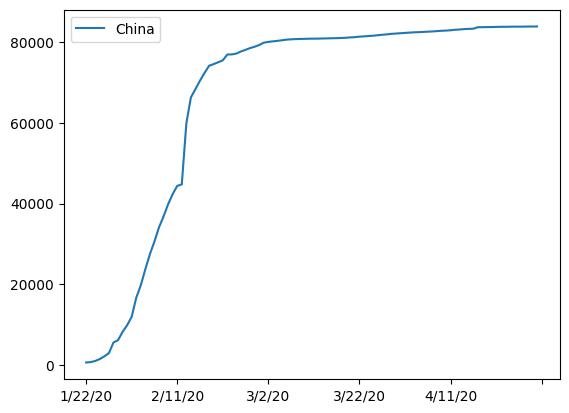

In [205]:
corona_dataset_aggregated.loc['China'].plot()
plt.legend()

Text(0.5, 1.0, 'The spread of the virus in Vietnam from Jan 22nd - Nov 4th, 2020')

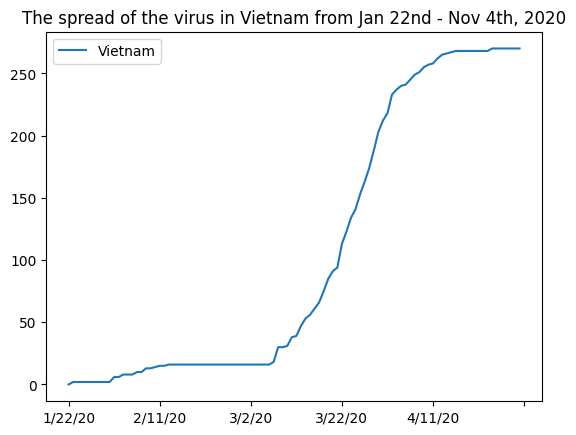

In [206]:
corona_dataset_aggregated.loc['Vietnam'].plot()
plt.legend()
plt.title("The spread of the virus in Vietnam from Jan 22nd - Nov 4th, 2020")

Text(0.5, 1.0, 'Comparison the spread of the virus in China, Vietnam, US and Russia')

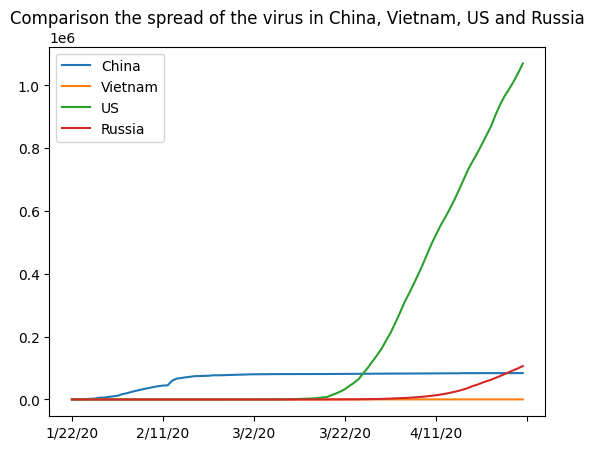

In [207]:
corona_dataset_aggregated.loc['China'].plot()
corona_dataset_aggregated.loc['Vietnam'].plot()
corona_dataset_aggregated.loc['US'].plot()
corona_dataset_aggregated.loc['Russia'].plot()
plt.legend()
plt.title("Comparison the spread of the virus in China, Vietnam, US and Russia")

Text(0.5, 1.0, 'Spread of the virus in the US for the first 5 dates only')

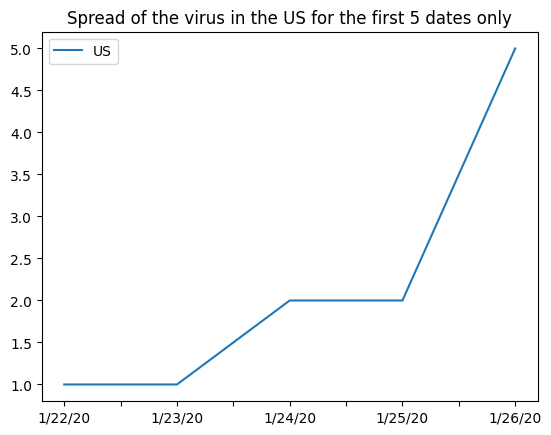

In [208]:
#Spread of the virus in the US for the first 5 dates only
corona_dataset_aggregated.loc['US'][:5].plot()
plt.legend()
plt.title("Spread of the virus in the US for the first 5 dates only")

### task 3.1: caculating the first derivative of the curve

Text(0.5, 1.0, 'The day-to-day variation in COVID-19 statistics in China over time')

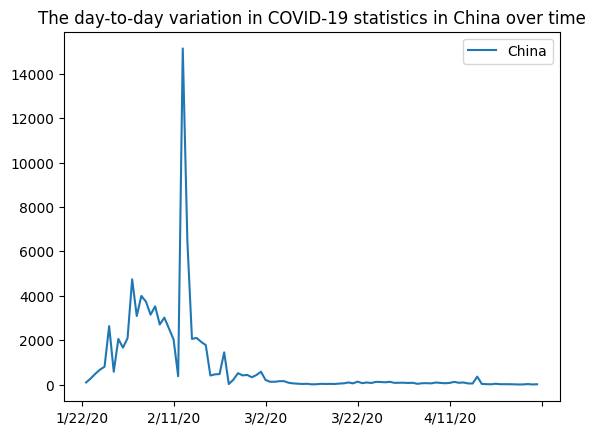

In [209]:
corona_dataset_aggregated.loc["China"].diff().plot()
plt.legend()
plt.title("The day-to-day variation in COVID-19 statistics in China over time")
# This below plot will show us the change in infection rate day by day and what we are looking for is the maximum number.

### task 3.2: find maxmimum infection rate for China

In [210]:
corona_dataset_aggregated.loc["China"].diff().max()
#In only 24 hrs, the difference was 15136

15136.0

In [211]:
corona_dataset_aggregated.loc["Vietnam"].diff().max()


19.0

In [212]:
corona_dataset_aggregated.loc["US"].diff().max()


36188.0

Text(0.5, 1.0, 'US: The day-to-day variation in COVID-19 statistics over time')

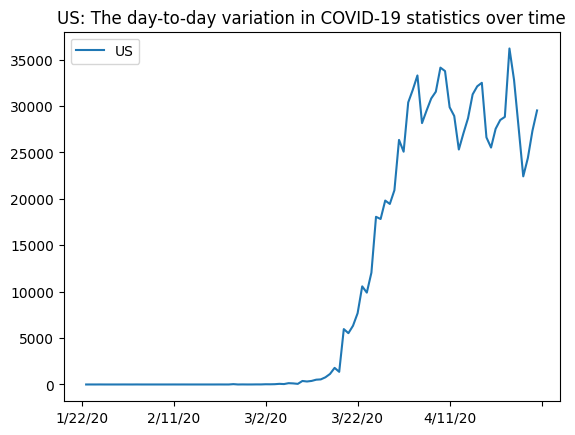

In [213]:
corona_dataset_aggregated.loc["US"].diff().plot()
plt.legend()
plt.title("US: The day-to-day variation in COVID-19 statistics over time")

### Task 3.3: find maximum infection rate for all of the countries. 

In [214]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries :
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
max_infection_rates

[232.0,
 34.0,
 199.0,
 43.0,
 5.0,
 6.0,
 291.0,
 134.0,
 497.0,
 1321.0,
 105.0,
 7.0,
 301.0,
 641.0,
 12.0,
 1485.0,
 2454.0,
 4.0,
 19.0,
 1.0,
 104.0,
 92.0,
 7.0,
 7502.0,
 26.0,
 137.0,
 41.0,
 21.0,
 6.0,
 45.0,
 31.0,
 203.0,
 2778.0,
 31.0,
 21.0,
 1138.0,
 15136.0,
 353.0,
 1.0,
 57.0,
 81.0,
 37.0,
 113.0,
 96.0,
 63.0,
 58.0,
 381.0,
 391.0,
 99.0,
 156.0,
 5.0,
 371.0,
 11536.0,
 269.0,
 32.0,
 130.0,
 7.0,
 134.0,
 20.0,
 9.0,
 5.0,
 267.0,
 26849.0,
 38.0,
 5.0,
 42.0,
 6933.0,
 403.0,
 156.0,
 6.0,
 68.0,
 167.0,
 132.0,
 12.0,
 10.0,
 3.0,
 72.0,
 210.0,
 99.0,
 1893.0,
 436.0,
 3186.0,
 91.0,
 1515.0,
 1131.0,
 6557.0,
 52.0,
 1161.0,
 40.0,
 264.0,
 29.0,
 851.0,
 289.0,
 300.0,
 69.0,
 3.0,
 48.0,
 61.0,
 17.0,
 13.0,
 21.0,
 90.0,
 234.0,
 7.0,
 14.0,
 10.0,
 235.0,
 190.0,
 58.0,
 52.0,
 2.0,
 41.0,
 1425.0,
 222.0,
 12.0,
 13.0,
 30.0,
 281.0,
 19.0,
 3.0,
 14.0,
 1346.0,
 89.0,
 2.0,
 69.0,
 208.0,
 107.0,
 386.0,
 144.0,
 1292.0,
 357.0,
 5.0,
 27.0,
 3683.0,

In [215]:
# create a new columns "max_infection_rates"
corona_dataset_aggregated["max_infection_rates"] = max_infection_rates

corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


### Task 3.4: create a new dataframe with only needed columns

In [216]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rates"])

In [217]:
corona_data.head()

,max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


### Task4: 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Task 4.1 : importing the dataset

In [218]:
# import the worldwide_happiness_report.csv
happiness_report_csv = pd.read_csv("worldwide_happiness_report.csv")

In [219]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [220]:
happiness_report_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


### Task 4.2: let's drop the useless columns 

In [221]:
useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [222]:
happiness_report_csv.drop(useless_cols, axis=1, inplace=True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [223]:
happiness_report_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             156 non-null    object 
 1   GDP per capita                156 non-null    float64
 2   Social support                156 non-null    float64
 3   Healthy life expectancy       156 non-null    float64
 4   Freedom to make life choices  156 non-null    float64
dtypes: float64(4), object(1)
memory usage: 6.2+ KB


### Task 4.3: changing the indices of the dataframe

In [224]:
# change the indices of to "Country or region"
happiness_report_csv.set_index("Country or region", inplace=True)

In [225]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Task4.4: now let's join two dataset we have prepared  

#### Corona Dataset :

In [226]:
corona_data.head()

,max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [227]:
corona_data.shape  
# 187 countries/regions

(187, 1)

#### wolrd happiness report Dataset :

In [228]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [229]:
happiness_report_csv.shape
# 156 countries/regions, that means there is less countries than in corona_data

(156, 4)

In [230]:
#Inner join
data_joined = corona_data.join(happiness_report_csv,
                how = "inner"    #method/type of join
                )
data_joined.head()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


In [231]:
data_joined.info()
# 143 countries with 5 features (columns)

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, Afghanistan to Zimbabwe
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   max_infection_rates           143 non-null    float64
 1   GDP per capita                143 non-null    float64
 2   Social support                143 non-null    float64
 3   Healthy life expectancy       143 non-null    float64
 4   Freedom to make life choices  143 non-null    float64
dtypes: float64(5)
memory usage: 6.7+ KB


### Task 4.5: correlation matrix 

In [232]:
data_joined.corr()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rates,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


### Task 5: Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [233]:
data_joined.head()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Task 5.1: Plotting GDP vs maximum Infection rate

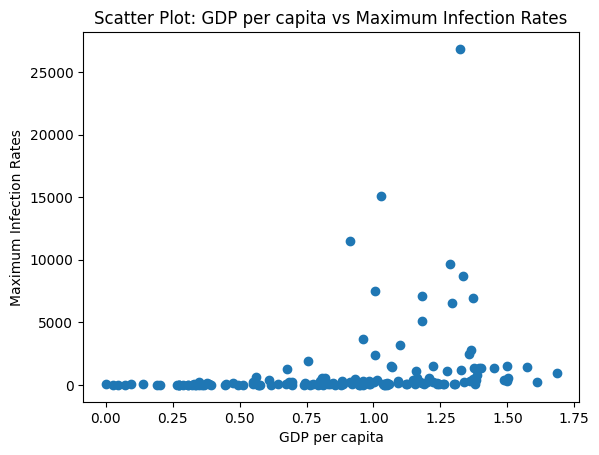

In [234]:

x = data_joined["GDP per capita"]
y = data_joined["max_infection_rates"]

# Create a scatter plot
plt.scatter(x, y)

# Add data labels
#for i, txt in enumerate(data_joined.index):
#    plt.annotate(txt, (x[i], y[i]), xytext=(2, 2), textcoords='offset points')

# Add labels and title
plt.xlabel("GDP per capita")
plt.ylabel("Maximum Infection Rates")
plt.title("Scatter Plot: GDP per capita vs Maximum Infection Rates")

# Show the plot
plt.show()


<Axes: xlabel='GDP per capita', ylabel='max_infection_rates'>

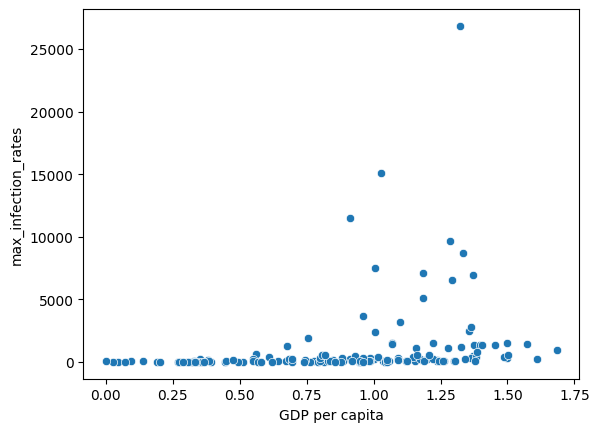

In [235]:
# Using seaborn library to plot the figure
sns.scatterplot(data=data_joined, x=x, y=y)
# resulted figure as the same above


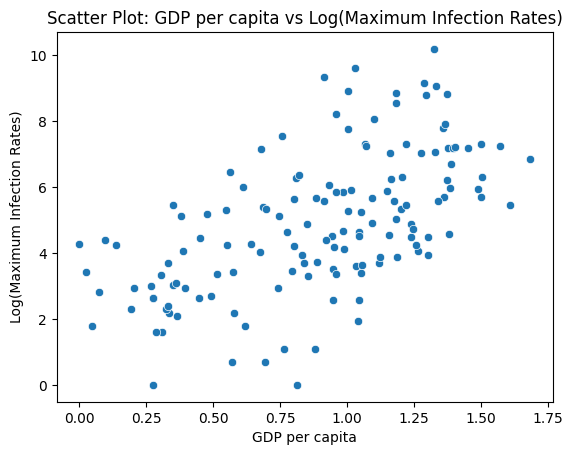

In [236]:
# Using seaborn library to plot and  apply log scaling to y

x = data_joined["GDP per capita"]
y = data_joined["max_infection_rates"]

# Create a scatter plot using Seaborn
# sns.scatterplot(x, np.log(y)) -->TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given
sns.scatterplot(data=data_joined, x=x, y=np.log(y))

# Add labels and title
plt.xlabel("GDP per capita")
plt.ylabel("Log(Maximum Infection Rates)")
plt.title("Scatter Plot: GDP per capita vs Log(Maximum Infection Rates)")

# Show the plot
plt.show()




Text(0.5, 1.0, 'Scatter Plot with Regression Line: GDP per capita vs Log(Maximum Infection Rates)')

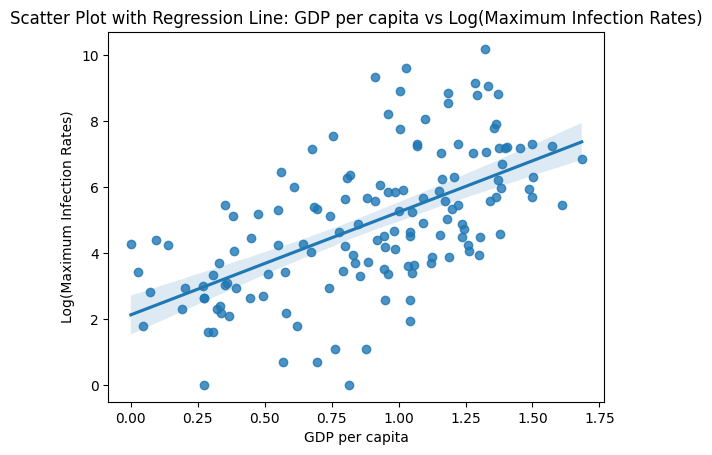

In [237]:
#Scatter Plot with Regression Line
x = data_joined["GDP per capita"]
y = data_joined["max_infection_rates"]

sns.regplot(data =data_joined, x=x ,y=np.log(y))
# Add labels and title
plt.xlabel("GDP per capita")
plt.ylabel("Log(Maximum Infection Rates)")
plt.title("Scatter Plot with Regression Line: GDP per capita vs Log(Maximum Infection Rates)")


### Task 5.2: Plotting Social support vs maximum Infection rate

Text(0.5, 1.0, 'Scatter Plot: Social Support vs Maximum Infection Rates')

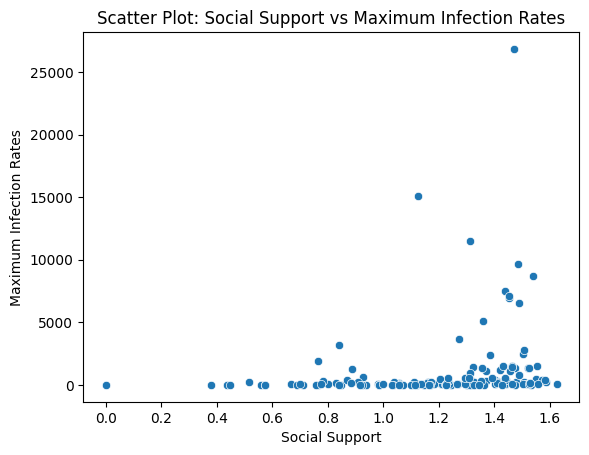

In [238]:
x = data["Social support"]
y = data["max_infection_rates"]

sns.scatterplot(data=data_joined, x=x, y=y)

# Add labels and title
plt.xlabel("Social Support")
plt.ylabel("Maximum Infection Rates")
plt.title("Scatter Plot: Social Support vs Maximum Infection Rates")

Text(0.5, 1.0, 'Scatter Plot with Regression Line: Social Support vs Log(Maximum Infection Rates)')

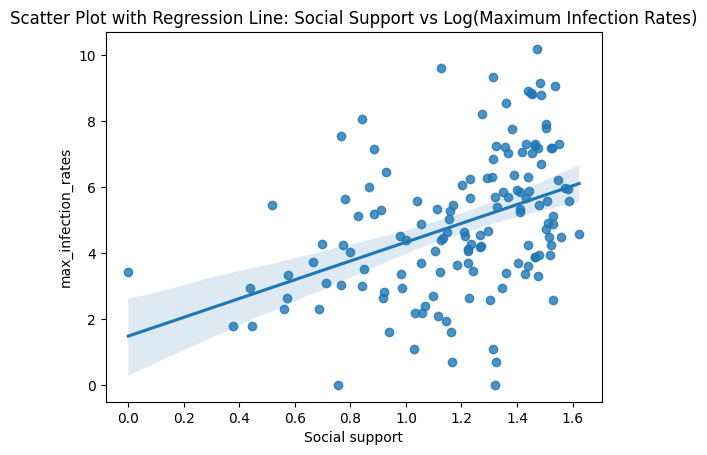

In [239]:
sns.regplot(data=data_joined, x=x, y=np.log(y))
plt.title("Scatter Plot with Regression Line: Social Support vs Log(Maximum Infection Rates)")

### Task 5.3: Plotting Healthy life expectancy vs maximum Infection rate

Text(0.5, 1.0, 'Scatter Plot: Healthy life expectancy vs Maximum Infection Rates')

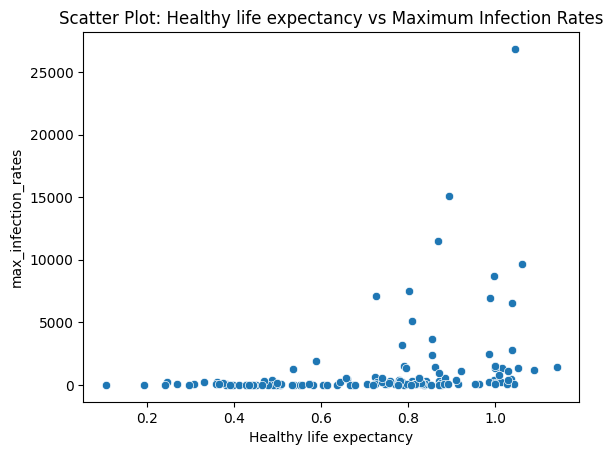

In [240]:
x = data["Healthy life expectancy"]
y = data["max_infection_rates"]
sns.scatterplot(data=data_joined, x=x, y=y)
plt.title("Scatter Plot: Healthy life expectancy vs Maximum Infection Rates")

Text(0.5, 1.0, 'Scatter Plot with Regression Line: Healthy life expectancy vs Log(Maximum Infection Rates)')

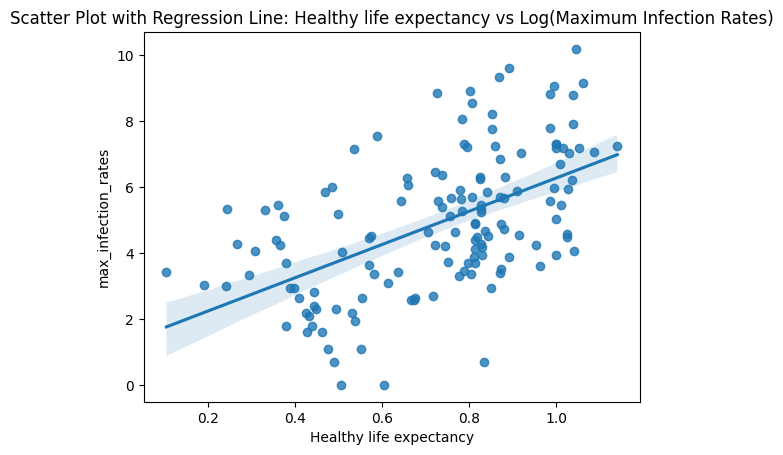

In [241]:
sns.regplot(data=data_joined, x=x, y=np.log(y))
plt.title("Scatter Plot with Regression Line: Healthy life expectancy vs Log(Maximum Infection Rates)")

### Task 5.4: Plotting Freedom to make life choices vs maximum Infection rate

Text(0.5, 1.0, 'Scatter Plot: Freedom to make life choices vs Maximum Infection Rates')

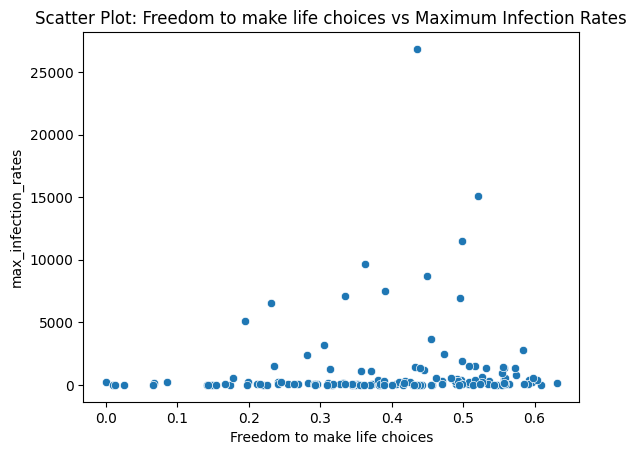

In [242]:
x = data["Freedom to make life choices"]
y = data["max_infection_rates"]
sns.scatterplot(data=data_joined, x=x, y=y)
plt.title("Scatter Plot: Freedom to make life choices vs Maximum Infection Rates")

Text(0.5, 1.0, 'Scatter Plot with Regression Line: Freedom to make life choices vs Log(Maximum Infection Rates)')

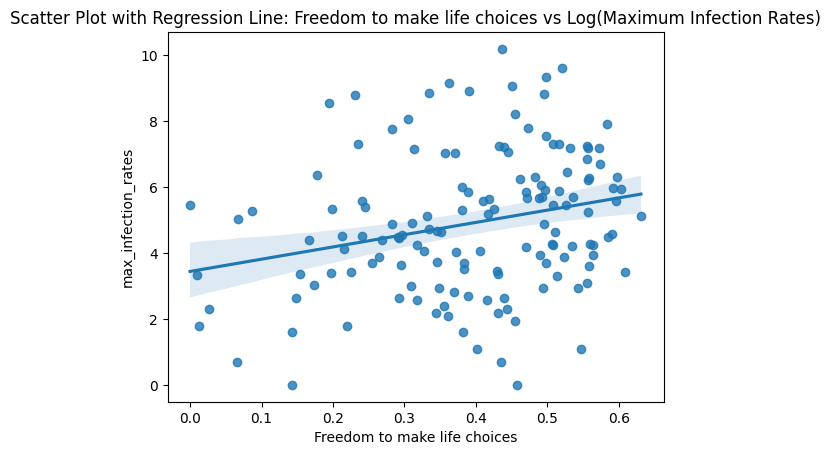

In [243]:
sns.regplot(data=data_joined, x=x, y=np.log(y))
plt.title("Scatter Plot with Regression Line: Freedom to make life choices vs Log(Maximum Infection Rates)")